In [2]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from functools import partial
from sklearn import preprocessing

In [214]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [215]:
error = mean_absolute_error

In [216]:
X_ltrain, X_test, Y_ltrain, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [217]:
from sklearn import preprocessing
X_ltrain = preprocessing.normalize(X_ltrain);
X_test =  preprocessing.normalize(X_test);

In [218]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_ltrain, Y_ltrain, test_size = 100, random_state = 17)

In [219]:
X_train.shape

(554, 27827)

# Feature Selection

In [11]:
X_train.shape

(554, 27827)

In [13]:
27927/1000

27.927

## Importance

In [220]:
%%time
rfe = RFE(estimator=LinearRegression(), n_features_to_select=100, step=1)
rfe.fit(X_train, Y_train)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)


CPU times: user 6h 42min 54s, sys: 9min 33s, total: 6h 52min 27s
Wall time: 1h 43min 10s


RFE(estimator=LinearRegression(), n_features_to_select=100)

# Retrain and Map

In [221]:
T_ltrain = rfe.transform(X_ltrain)
T_train  = rfe.transform(X_train)
T_valid  = rfe.transform(X_valid)
T_test   = rfe.transform(X_test)

# Try different regression models

## Linear Regression

### No need for optimization

### Learning Curve

In [222]:
lr = LinearRegression()
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))

In [223]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    lr.fit(Tt_train,Yt_train)
    Y_pred = lr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_lr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 26.4 ms


In [224]:
optimal_index_loss_lr = np.unravel_index(losses_lr.argmin(), losses_lr.shape)
optimal_n_train_lr = numbers_train[optimal_index_loss_lr]
min_loss_lr = losses_lr[optimal_index_loss_lr]
print("Minimum loss of LR with importance is {} when number of train is {}  ".format(min_loss_lr,optimal_n_train_lr))

Minimum loss of LR with importance is 0.5363459748493273 when number of train is 354  


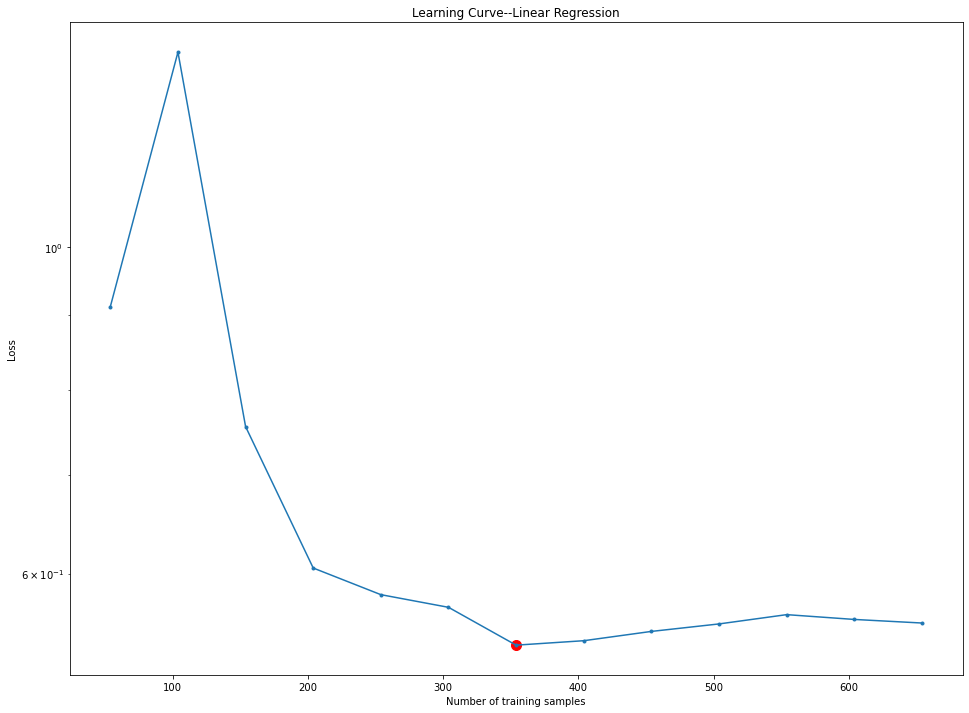

In [225]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_lr,'.-')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Linear Regression')
plt.show()

## Ridge Regression

### Optimization

#### Optimization of alpha

In [226]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_rr_alpha = np.zeros((len(alphas)))
for i,alpha in enumerate(alphas):
    rr = Ridge(alpha = alpha)
    rr.fit(T_train, Y_train)
    Y_pred = rr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_rr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 26.4 ms


In [227]:
optimal_index_alpha_rr = np.unravel_index(losses_rr_alpha.argmin(), losses_rr_alpha.shape)
optimal_alpha_rr = alphas[optimal_index_alpha_rr]
print("Optimal alpha for RR with importance is {} ".format(optimal_alpha_rr))

Optimal alpha for RR with importance is 1e-05 


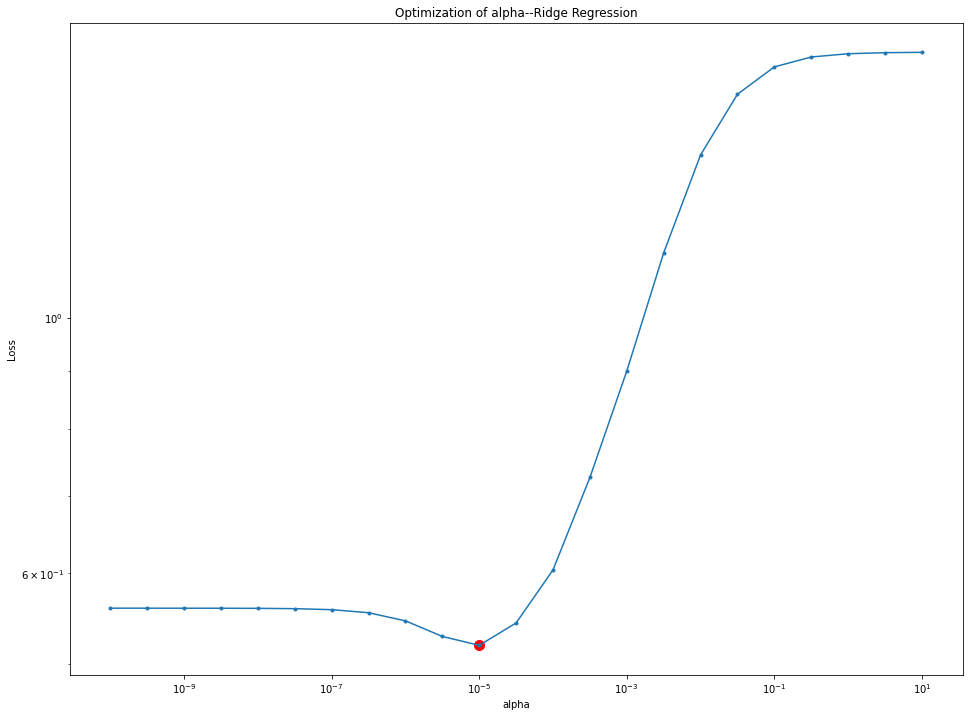

In [228]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_rr_alpha,'.-')
plt.scatter(optimal_alpha_rr, losses_rr_alpha[optimal_index_alpha_rr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of alpha--'+'Ridge Regression')
plt.show()

### Learning Curve

In [229]:
best_rr = Ridge(alpha = optimal_alpha_rr)
numbers_train = np.arange(54,655,50)
losses_rr = np.zeros((len(numbers_train)))

In [230]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_rr.fit(Tt_train,Yt_train)
    Y_pred = best_rr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_rr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 50.5 ms, sys: 4 µs, total: 50.5 ms
Wall time: 12.9 ms


In [231]:
losses_rr

array([0.84853436, 0.67160955, 0.59801185, 0.58434574, 0.56872761,
       0.53436629, 0.53718017, 0.54830082, 0.55520811, 0.55514444,
       0.55963384, 0.55490879, 0.55029291])

In [232]:
optimal_index_loss_rr = np.unravel_index(losses_rr.argmin(), losses_rr.shape)
optimal_n_train_rr = numbers_train[optimal_index_loss_rr]
min_loss_rr = losses_rr[optimal_index_loss_rr]
print("Minimum loss of RR with Pimportance is {} when number of train is {}  ".format(min_loss_rr,optimal_n_train_rr))

Minimum loss of RR with Pimportance is 0.5343662943666455 when number of train is 304  


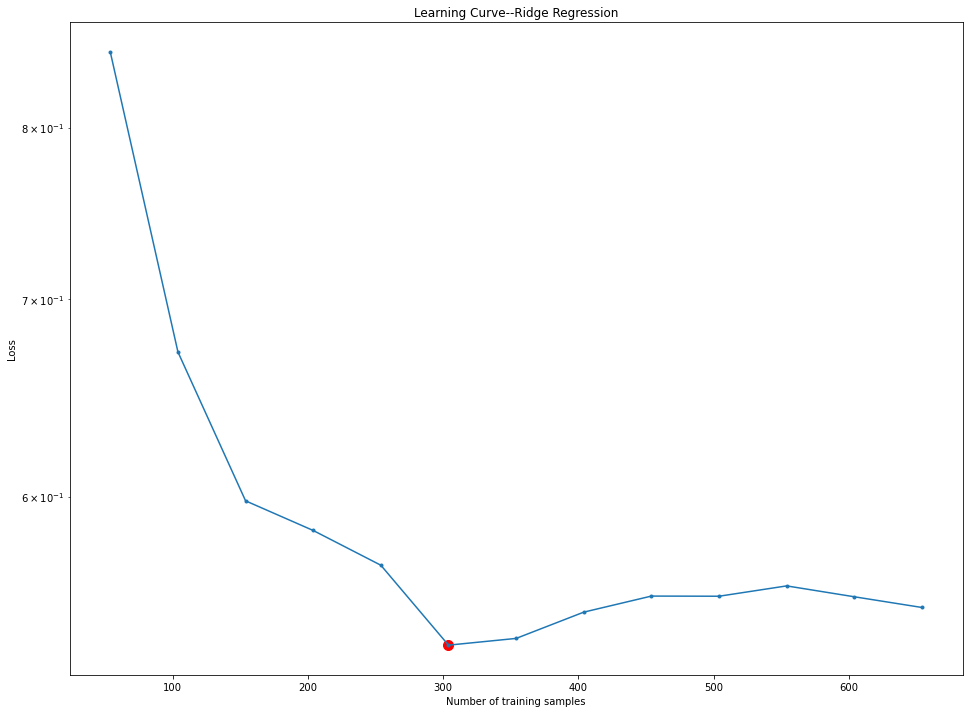

In [233]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_rr,'.-')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Ridge Regression')
plt.show()

## Kernel Ridge Regression

### Optimization

#### Optimization of gamma

In [234]:
%%time
gammas =  np.logspace(1, 2, 23)
losses_krr_gamma = np.zeros((len(gammas)))
kernel_params = {"kernel": "rbf", "gamma": 1.0}
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = 1e-6, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_gamma[i] = loss
    print(gamma)

10.0
11.103363181676379
12.32846739442066
13.688745095370805
15.199110829529339
16.876124757881477
18.73817422860384
20.805675382171703
23.101297000831604
25.650209056800456
28.48035868435802
31.622776601683793
35.11191734215131
38.98603702549072
43.28761281083057
48.06380863064391
53.3669923120631
59.25530975545678
65.79332246575683
73.05271542664457
81.11308307896873
90.06280202112787
100.0
CPU times: user 682 ms, sys: 20 ms, total: 702 ms
Wall time: 175 ms


In [235]:
optimal_index_gamma_krr = np.unravel_index(losses_krr_gamma.argmin(), losses_krr_gamma.shape)
optimal_gamma_krr = gammas[optimal_index_gamma_krr]
print("Optimal gamma for KRR with importance is {} ".format(optimal_gamma_krr))

Optimal gamma for KRR with importance is 28.48035868435802 


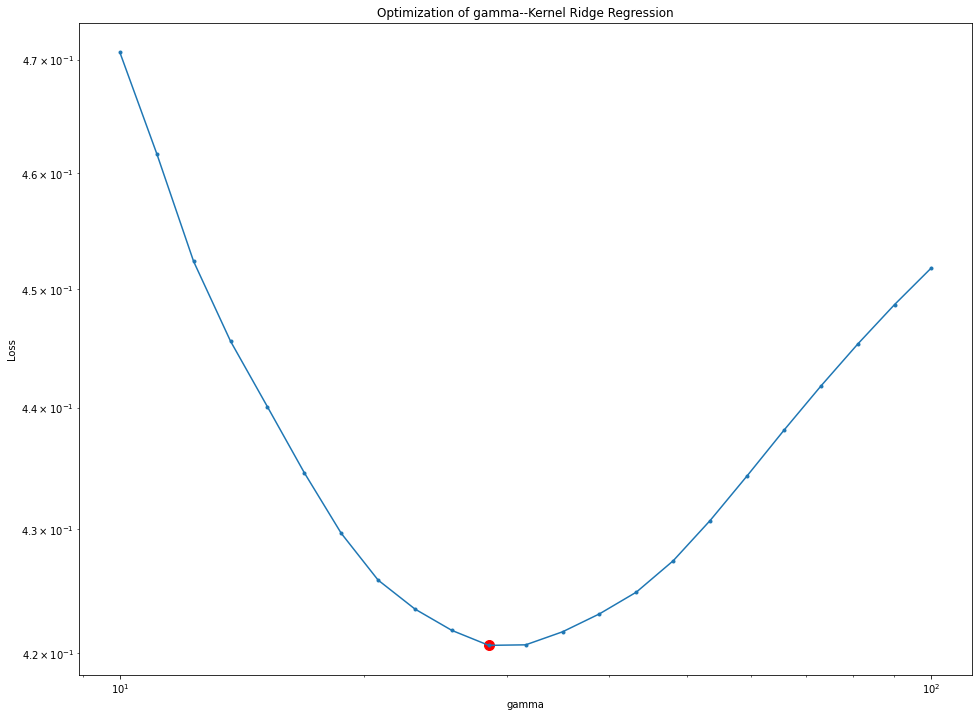

In [236]:
plt.figure(figsize=(16, 12))
plt.plot(gammas,losses_krr_gamma,'.-')
plt.scatter(optimal_gamma_krr, losses_krr_gamma[optimal_index_gamma_krr], s = 100,marker='o', color='r')
plt.xlabel('gamma')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of gamma--'+'Kernel Ridge Regression')
plt.show()

#### Optimization of alpha

In [237]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_krr_alpha = np.zeros((len(alphas)))
kernel_params = {"kernel": "rbf", "gamma": optimal_gamma_krr}
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 656 ms, sys: 12.2 ms, total: 668 ms
Wall time: 167 ms


In [238]:
optimal_index_alpha_krr = np.unravel_index(losses_krr_alpha.argmin(), losses_krr_alpha.shape)
optimal_alpha_krr = alphas[optimal_index_alpha_krr]
print("Optimal alpha for KRR with importance is {} ".format(optimal_alpha_krr))

Optimal alpha for KRR with importance is 1e-06 


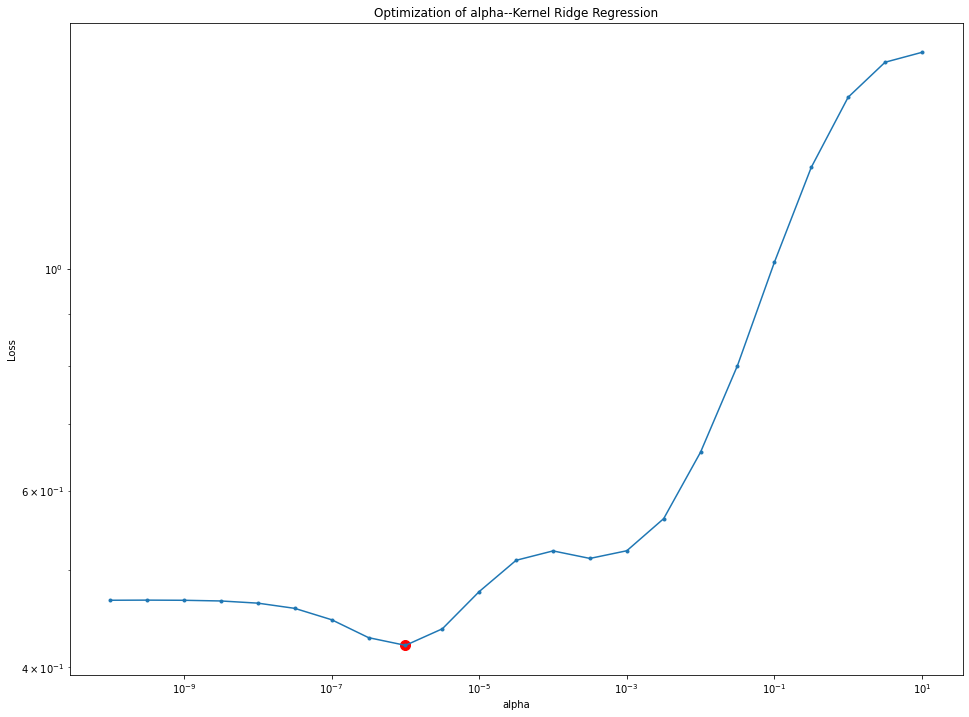

In [239]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_krr_alpha,'.-')
plt.scatter(optimal_alpha_krr, losses_krr_alpha[optimal_index_alpha_krr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of alpha--'+'Kernel Ridge Regression')
plt.show()

### Learning Curve

In [240]:
best_krr = KernelRidge(alpha = optimal_alpha_krr, **kernel_params)
numbers_train = np.arange(54,655,50)
losses_krr = np.zeros((len(numbers_train)))

In [241]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_krr.fit(Tt_train,Yt_train)
    Y_pred = best_krr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_krr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 297 ms, sys: 0 ns, total: 297 ms
Wall time: 74.4 ms


In [242]:
losses_krr

array([0.8996711 , 0.83074218, 0.6685428 , 0.50739802, 0.5088488 ,
       0.45108957, 0.45874539, 0.4472522 , 0.43880497, 0.4468409 ,
       0.42371226, 0.42244247, 0.42569874])

In [243]:
optimal_index_loss_krr = np.unravel_index(losses_krr.argmin(), losses_krr.shape)
optimal_n_train_krr = numbers_train[optimal_index_loss_krr]
min_loss_krr = losses_krr[optimal_index_loss_krr]
print("Minimum loss of KRR with importance selector is {} when number of train is {}  ".format(min_loss_krr,optimal_n_train_krr))

Minimum loss of KRR with importance selector is 0.42244247238820604 when number of train is 604  


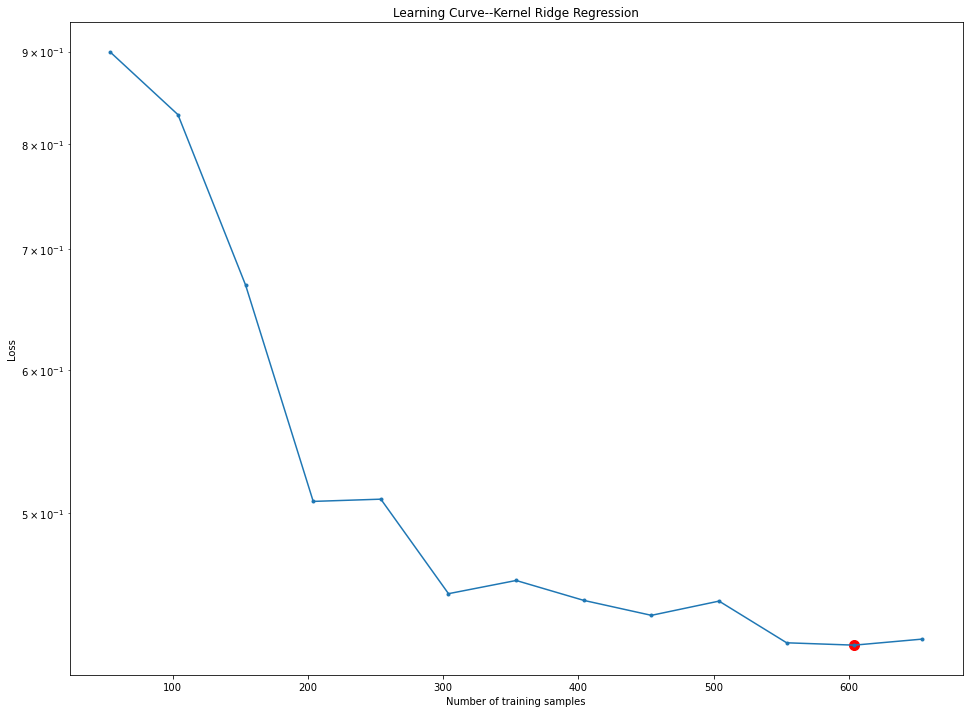

In [244]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression')
plt.show()

### Summary

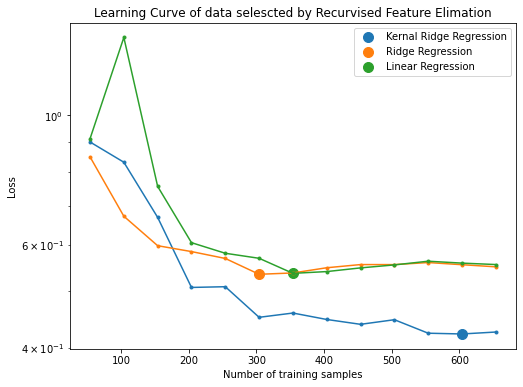

In [275]:
plt.figure(figsize=(8,6))
plt.plot(numbers_train,losses_krr,'.-')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o',label='Kernal Ridge Regression')
plt.plot(numbers_train,losses_rr,'.-')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o',label='Ridge Regression')
plt.plot(numbers_train,losses_lr,'.-')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o',label='Linear Regression')

plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve of data selescted by Recurvised Feature Elimation')

plt.savefig('RFE.png')
plt.show()